# <center><b>Applying <font color = 'red'>T-SNE</font>

In [11]:
from sklearn.manifold import TSNE
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

## <u><font color = 'darkorange'>To Load The Final Dataset --</font></u>

In [2]:
# os.getcwd()
conn = sqlite3.connect('final.sqlite')
final = pd.read_sql_query("""
SELECT *
FROM Reviews""",conn)

In [3]:
print("Total positive reviews are {}".format(final.Score[:30000].value_counts()[0] ))
print("Total negetive reviews are {}".format(final.Score[:30000].value_counts()[1] ))

Total positive reviews are 3241
Total negetive reviews are 26759


**Hence, lets Undersample the data for better visualization** 

In [4]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X, Y = rus.fit_resample(final[:30000], final.Score[:30000])

print('After UnderSampling, total reviews remaining: {} \n'.format(Y.shape[0]))
print("After UnderSampling, counts of label '1': {}".format(sum(Y == 1)))
print("After UnderSampling, counts of label '0': {}".format(sum(Y == 0)))

After UnderSampling, total reviews remaining: 6482 

After UnderSampling, counts of label '1': 3241
After UnderSampling, counts of label '0': 3241


In [5]:
stemmed_rev = X.CleanedText.values
unstemmed_rev = X.Unstemmed_CleanedText.values
label = X.Score.values
label.shape = (label.shape[0] , 1)
print("Totoal reviews taken :: " , len(label))

Totoal reviews taken ::  6482


## <u><font color = 'PURPLE'> [1] Applying TSNE on Text BOW vectors

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer

cv = CountVectorizer(min_df = 10 , max_features = 5000)
cv2 = CountVectorizer(ngram_range = (1,2) , min_df = 10 , max_features = 5000)

bow = cv.fit_transform(stemmed_rev)
bow2 = cv2.fit_transform(stemmed_rev)

bow = Normalizer().fit_transform(bow)
bow2 = Normalizer().fit_transform(bow2)

#### <u><font color = 'DarkOrange'> UNI-GRAM

In [37]:
tsne_model = TSNE(n_components = 2 , random_state = 1 , perplexity = 100 , n_iter = 10000 , learning_rate = 100)
tsne_data = tsne_model.fit_transform(np.asarray(bow.todense()))

C:\Users\aarat\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


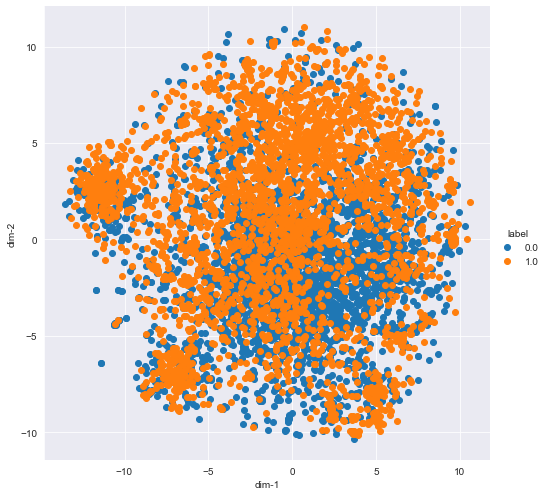

In [38]:
tsne_data = np.hstack((tsne_data , label))
tsne_df = pd.DataFrame(data = tsne_data , columns = ['dim-1' , 'dim-2' , 'label'])

sns.set_style("darkgrid")
sns.FacetGrid(data = tsne_df , hue = "label" , height = 7).map(plt.scatter , 'dim-1' , 'dim-2').add_legend()
plt.show()

#### <u><font color = 'DarkOrange'> UNI+BI-GRAM

In [58]:
tsne_model = TSNE(n_components = 2 , random_state = 1 , perplexity = 20 , n_iter = 7000 , learning_rate = 200)
tsne_data = tsne_model.fit_transform(np.asarray(bow2.todense()))

C:\Users\aarat\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


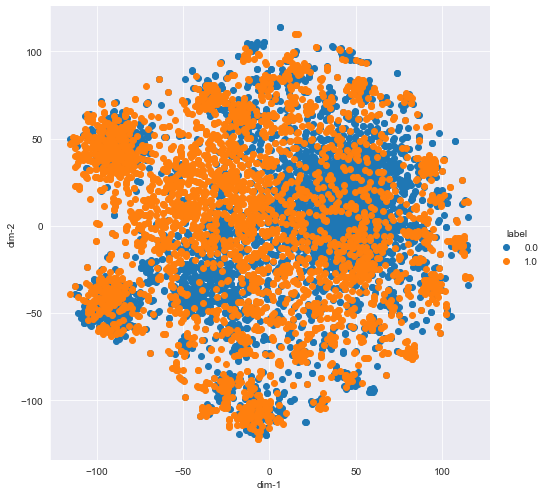

In [59]:
tsne_data = np.hstack((tsne_data , label))
tsne_df = pd.DataFrame(data = tsne_data , columns = ['dim-1' , 'dim-2' , 'label'])

sns.set_style("darkgrid")
sns.FacetGrid(data = tsne_df , hue = "label" , height = 7).map(plt.scatter , 'dim-1' , 'dim-2').add_legend()
plt.show()

## <u><font color = 'PURPLE'> [2] Applying TSNE on Text TFIDF vectors

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer

In [61]:
tfidf_vect = TfidfVectorizer(min_df = 5 , max_features = 5000)
tfidf_vect2 = TfidfVectorizer(ngram_range = (1,2) , min_df = 5 , max_features = 5000)

tfidf = tfidf_vect.fit_transform(stemmed_rev)
tfidf2 = tfidf_vect2.fit_transform(stemmed_rev)

tfidf = Normalizer().fit_transform(tfidf)
tfidf2 = Normalizer().fit_transform(tfidf2)

#### <u><font color = 'DarkOrange'> UNI-GRAM

In [62]:
tsne_model = TSNE(n_components = 2 , random_state = 1 , perplexity = 70 , n_iter = 7000 , learning_rate = 200)
tsne_data = tsne_model.fit_transform(np.asarray(tfidf.todense()))

C:\Users\aarat\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


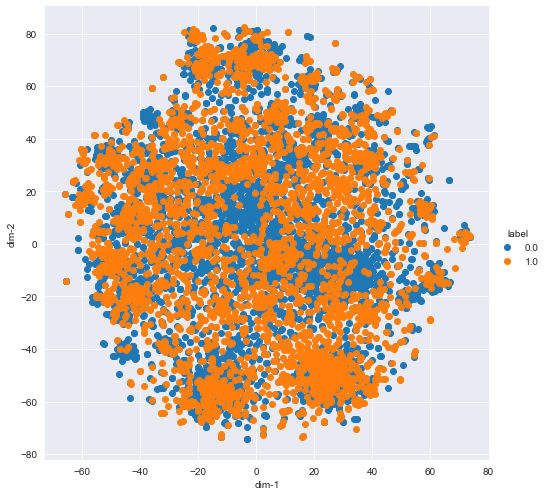

In [63]:
tsne_data = np.hstack((tsne_data , label))
tsne_df = pd.DataFrame(data = tsne_data , columns = ['dim-1' , 'dim-2' , 'label'])

sns.set_style("darkgrid")
sns.FacetGrid(data = tsne_df , hue = "label" , height = 7).map(plt.scatter , 'dim-1' , 'dim-2').add_legend()
plt.show()

#### <u><font color = 'DarkOrange'> UNI+BI-GRAM

In [64]:
tsne_model = TSNE(n_components = 2 , random_state = 1 , perplexity = 90 , n_iter = 7000 , learning_rate = 200)
tsne_data = tsne_model.fit_transform(np.asarray(tfidf2.todense()))

C:\Users\aarat\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


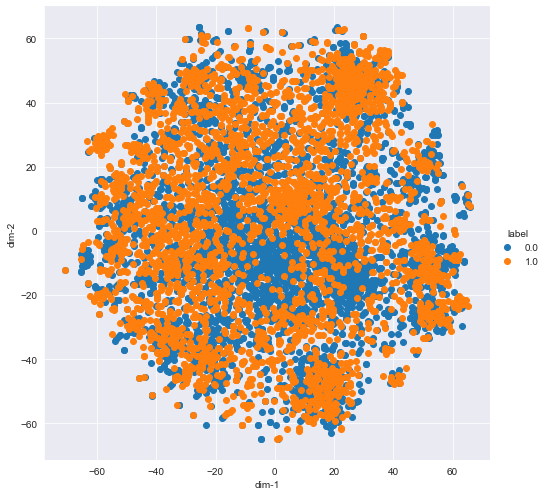

In [65]:
tsne_data = np.hstack((tsne_data , label))
tsne_df = pd.DataFrame(data = tsne_data , columns = ['dim-1' , 'dim-2' , 'label'])

sns.set_style("darkgrid")
sns.FacetGrid(data = tsne_df , hue = "label" , height = 7).map(plt.scatter , 'dim-1' , 'dim-2').add_legend()
plt.show()

## <u><font color = 'PURPLE'> [3] Applying TSNE on Text Avg W2V vectors

In [66]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [17]:
w2v_model = KeyedVectors.load_word2vec_format("w2v_model.bin" , binary = True)
vocabulary = w2v_model.key_to_index

avg_w2v_review_vectors = []

for review in tqdm(unstemmed_rev):# preprocessed_reviews = 36k
    vec = np.zeros(150) # as we created 150 dimensional w2v
    count = 0
    for word in review.split():
        if word in vocabulary:
            vec += w2v_model[word]
            count += 1
    if count > 0:
        vec /= count
    
    avg_w2v_review_vectors.append(vec)
    
avg_w2v_review_vectors = np.array(avg_w2v_review_vectors)
avg_w2v_review_vectors = Normalizer().fit_transform(avg_w2v_review_vectors)

print("DIMENSIONS OF REVIEW VECOTRS CONVERTED ::" , avg_w2v_review_vectors.shape)
# print("DIMENSIONS OF REVIEW VECOTRS ::" , len(avg_w2v_review_vectors[1]))
print ("TYPE AVG_W2V_REVIEW_VECTORS ::" , type(avg_w2v_review_vectors))    

100%|███████████████████████████████████████████████████████████████████████████| 6482/6482 [00:00<00:00, 31294.87it/s]

DIMENSIONS OF REVIEW VECOTRS CONVERTED :: (6482, 150)
TYPE AVG_W2V_REVIEW_VECTORS :: <class 'numpy.ndarray'>


In [35]:
tsne_model = TSNE(n_components = 2 , random_state = 26 , perplexity = 50 , n_iter = 10000 , learning_rate = 100)
tsne_data = tsne_model.fit_transform(avg_w2v_review_vectors)

C:\Users\aarat\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


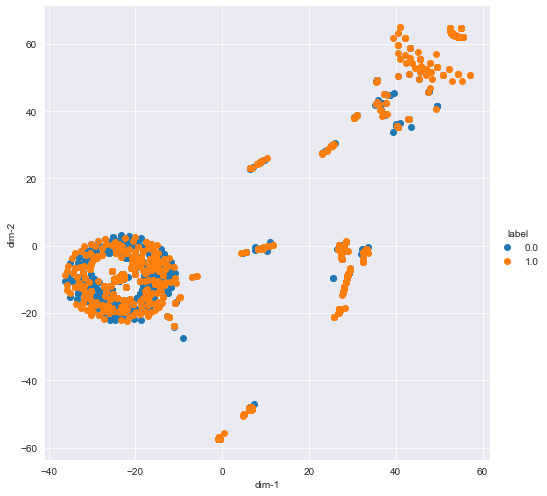

In [36]:
tsne_data = np.hstack((tsne_data , label))
tsne_df = pd.DataFrame(data = tsne_data , columns = ['dim-1' , 'dim-2' , 'label'])

sns.set_style("darkgrid")
sns.FacetGrid(data = tsne_df , hue = "label" , height = 7).map(plt.scatter , 'dim-1' , 'dim-2').add_legend()
plt.show()

## <u><font color = 'PURPLE'> [4] Applying TSNE on Text TF-IDF Weighted Avg W2V vectors

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from gensim.models import KeyedVectors

In [13]:
tfidf_vect = TfidfVectorizer(max_features = 5000)
tfidf_vect2 = TfidfVectorizer(ngram_range = (1,2) , max_features = 5000)

tfidf = tfidf_vect.fit_transform(unstemmed_rev)
tfidf2 = tfidf_vect2.fit_transform(unstemmed_rev)

tfidf = Normalizer().fit_transform(tfidf)
tfidf2 = Normalizer().fit_transform(tfidf2)

tfidf_feats = tfidf_vect.get_feature_names_out()
tfidf_feats2 = tfidf_vect2.get_feature_names_out()


#### <u><font color = 'DarkOrange'> UNI-GRAM

In [14]:
w2v_model = KeyedVectors.load_word2vec_format("w2v_model.bin" , binary = True)
vocabulary = w2v_model.key_to_index


tfidf_w2v_review_vectors = []

row = 0
for review in tqdm(unstemmed_rev):
    review_vec = np.zeros(150)
    weighted_sum = 0
    
    for word in review.split():
        if word in vocabulary and word in tfidf_feats:
            
            vec = w2v_model[word]
            tfidf_val = tfidf[row , np.where(tfidf_feats == word)[0][0]]
            
            review_vec += (vec * tfidf_val)
            weighted_sum += tfidf_val
            
    if weighted_sum > 0:
        review_vec /= weighted_sum
        
    tfidf_w2v_review_vectors.append(review_vec)
    row += 1

tfidf_w2v_review_vectors = np.array(tfidf_w2v_review_vectors)
tfidf_w2v_review_vectors = Normalizer().fit_transform(tfidf_w2v_review_vectors)

print("DIMENSIONS OF REVIEW VECOTRS CONVERTED ::" , tfidf_w2v_review_vectors.shape)
print ("TYPE TFIDF_W2V_REVIEW_VECTORS ::" , type(tfidf_w2v_review_vectors))    

100%|████████████████████████████████████████████████████████████████████████████| 6482/6482 [00:04<00:00, 1552.57it/s]


DIMENSIONS OF REVIEW VECOTRS CONVERTED :: (6482, 150)
TYPE TFIDF_W2V_REVIEW_VECTORS :: <class 'numpy.ndarray'>


In [15]:
tsne_model = TSNE(n_components = 2 , random_state = 1 , perplexity = 5 , n_iter = 10000 , learning_rate = 100)
tsne_data = tsne_model.fit_transform(tfidf_w2v_review_vectors)

C:\Users\aarat\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


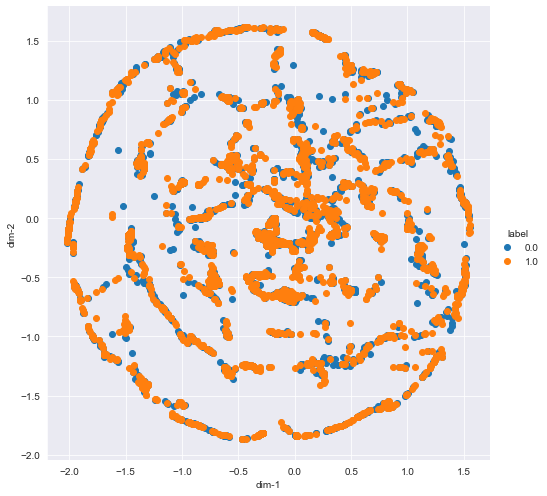

In [16]:
tsne_data = np.hstack((tsne_data , label))
tsne_df = pd.DataFrame(data = tsne_data , columns = ['dim-1' , 'dim-2' , 'label'])

sns.set_style("darkgrid")
sns.FacetGrid(data = tsne_df , hue = "label" , height = 7).map(plt.scatter , 'dim-1' , 'dim-2').add_legend()
plt.show()

#### <u><font color = 'DarkOrange'> UNI+BI-GRAM

In [115]:
w2v_model = KeyedVectors.load_word2vec_format("w2v_model.bin" , binary = True)
vocabulary = w2v_model.key_to_index


tfidf_w2v_review_vectors = []

row = 0
for review in tqdm(unstemmed_rev):
    review_vec = np.zeros(150)
    weighted_sum = 0
    
    for word in review.split():
        if word in vocabulary and word in tfidf_feats2:
            
            vec = w2v_model[word]
            tfidf_val = tfidf2[row , np.where(tfidf_feats2 == word)[0][0]]
            
            review_vec += (vec * tfidf_val)
            weighted_sum += tfidf_val
            
    if weighted_sum > 0:
        review_vec /= weighted_sum
        
    tfidf_w2v_review_vectors.append(review_vec)
    row += 1

tfidf2_w2v_review_vectors = np.array(tfidf_w2v_review_vectors)
tfidf2_w2v_review_vectors = Normalizer().fit_transform(tfidf_w2v_review_vectors)
    
print("DIMENSIONS OF REVIEW VECOTRS CONVERTED ::" , tfidf2_w2v_review_vectors.shape)
print ("TYPE TFIDF_W2V_REVIEW_VECTORS ::" , type(tfidf2_w2v_review_vectors))    

100%|████████████████████████████████████████████████████████████████████████████| 6482/6482 [00:01<00:00, 4170.55it/s]

DIMENSIONS OF REVIEW VECOTRS CONVERTED :: (6482, 150)
TYPE TFIDF_W2V_REVIEW_VECTORS :: <class 'numpy.ndarray'>


In [118]:
tsne_model = TSNE(n_components = 2 , random_state = 1 , perplexity = 10 , n_iter = 10000 , learning_rate = 300)
tsne_data = tsne_model.fit_transform(tfidf2_w2v_review_vectors)

C:\Users\aarat\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


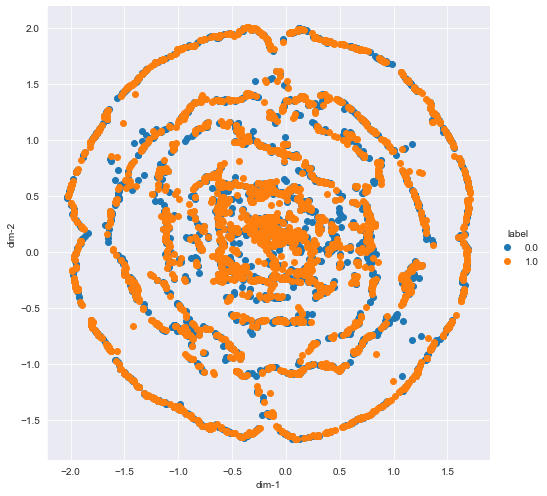

In [119]:
tsne_data = np.hstack((tsne_data , label))
tsne_df = pd.DataFrame(data = tsne_data , columns = ['dim-1' , 'dim-2' , 'label'])

sns.set_style("darkgrid")
sns.FacetGrid(data = tsne_df , hue = "label" , height = 7).map(plt.scatter , 'dim-1' , 'dim-2').add_legend()
plt.show()